In [ ]:
from functools import reduce
from gen_rand_blob import gen_rand_blob_mesh, mesh_to_mask_3d
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from dfsio import readdfs, writedfs
from surfproc import reducepatch
import nibabel as nb
import numpy as np


volume_size = (16,16,16ly)



vertices, faces = gen_rand_blob_mesh(radius=1.0,num_subdivisions=6,scale=0.7)

class m:
    pass

m.faces = faces


vertices = (vertices - vertices.min())/(vertices.max() - vertices.min())
m.vertices = vertices

print(m.vertices.shape)
#m = reducepatch(m, .9)
print(m.vertices.shape)

writedfs('icosphere.dfs', m)
m = readdfs('icosphere.dfs')


binary_mask = mesh_to_mask_3d((volume_size[0])*(m.vertices),volume_size=volume_size)


# Create a Nifti image from the binary mask
nifti_img = nb.Nifti1Image(np.uint16(binary_mask), affine=None)

# Write the Nifti image to disk
nb.save(nifti_img, 'binary_mask.nii.gz')


print(binary_mask.shape)
print(binary_mask.sum())
# Display the binary mask
plt.imshow(binary_mask[:,:,int(volume_size[2]/4)], cmap='gray')
plt.show()




# Plot the mesh using Plotly





fig = go.Figure(data=[go.Mesh3d(x=m.vertices[:, 0], y=m.vertices[:, 1], z=m.vertices[:, 2], i=m.faces[:, 0], j=m.faces[:, 1], k=m.faces[:, 2])])
# Set layout
fig.update_layout(scene=dict(aspectmode="data"))
fig.update_layout(title=f'Icosphere Mesh')
fig.write_image('ico.png')
fig.show()


(119, 85, 103)


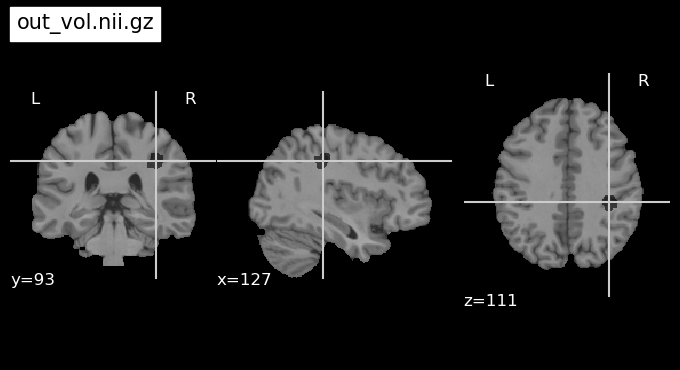

(127.0, 93.0, 111.0)


In [44]:
mri = '/home/ajoshi/Software/BrainSuite23a/svreg/BrainSuiteAtlas1/mri.bfc.nii.gz'

wm_mask = '/home/ajoshi/Software/BrainSuite23a/svreg/BrainSuiteAtlas1/mri.cortex.dewisp.mask.nii.gz'

v = nb.load(wm_mask).get_fdata().astype(np.uint16)
v_mri = nb.load(mri).get_fdata()
affine = nb.load(mri).affine

from numpy import cross
from scipy.ndimage import binary_dilation,binary_erosion

v = binary_erosion(v, iterations=8)



nonzero_indices = np.where(v != 0)
random_index = np.random.choice(len(nonzero_indices[0]))
rand_pix_cent = (nonzero_indices[0][random_index], nonzero_indices[1][random_index], nonzero_indices[2][random_index])

print(rand_pix_cent)
v_mri[rand_pix_cent[0]:rand_pix_cent[0]+volume_size[0], rand_pix_cent[1]:rand_pix_cent[1]+volume_size[1], rand_pix_cent[2]:rand_pix_cent[2]+volume_size[2]] *=  (1-0.6*binary_mask.astype(np.float64))

nifti_img = nb.Nifti1Image(np.uint16(v_mri), affine=affine).to_filename('out_vol.nii.gz')

from nilearn import plotting
#from nilearn.image.resampling import voxel_to_world
from nilearn.image import coord_transform


# Voxel coordinates
voxel_coords = (rand_pix_cent[0]+8, rand_pix_cent[1]+8, rand_pix_cent[2]+8)

# Convert voxel coordinates to world coordinates
world_coords = coord_transform(voxel_coords[0],voxel_coords[1],voxel_coords[2], affine)

plotting.plot_anat('out_vol.nii.gz', title='out_vol.nii.gz', display_mode='ortho', cut_coords=world_coords)
plotting.show()

print(world_coords)
